<a href="https://colab.research.google.com/github/naufaldi001/Data-Analyst-Career-Track/blob/main/EDA_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import json

In [ ]:
resp = requests.get('https://data.covid19.go.id/public/api/update.json')
resp

<Response [200]>

In [ ]:
#Melihat Headers 
print(resp.headers) 

{'Server': 'nginx', 'Date': 'Mon, 18 Oct 2021 18:28:36 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Mon, 18 Oct 2021 18:27:08 GMT', 'ETag': 'W/"616dbc7c-385fe"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [ ]:
#Mengekstrak isi Respon
cov_id_raw = resp.json()
print(cov_id_raw)

{'data': {'id': 1, 'jumlah_odp': 457320, 'jumlah_pdp': 0, 'total_spesimen': 43602816, 'total_spesimen_negatif': 34048270}, 'update': {'penambahan': {'jumlah_positif': 626, 'jumlah_meninggal': 47, 'jumlah_sembuh': 1593, 'jumlah_dirawat': -1014, 'tanggal': '2021-10-18', 'created': '2021-10-18 17:03:29'}, 'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z', 'key': 1583107200000, 'doc_count': 1, 'jumlah_meninggal': {'value': 0}, 'jumlah_sembuh': {'value': 0}, 'jumlah_positif': {'value': 2}, 'jumlah_dirawat': {'value': 2}, 'jumlah_positif_kum': {'value': 2}, 'jumlah_sembuh_kum': {'value': 0}, 'jumlah_meninggal_kum': {'value': 0}, 'jumlah_dirawat_kum': {'value': 2}}, {'key_as_string': '2020-03-03T00:00:00.000Z', 'key': 1583193600000, 'doc_count': 1, 'jumlah_meninggal': {'value': 0}, 'jumlah_sembuh': {'value': 0}, 'jumlah_positif': {'value': 0}, 'jumlah_dirawat': {'value': 0}, 'jumlah_positif_kum': {'value': 2}, 'jumlah_sembuh_kum': {'value': 0}, 'jumlah_meninggal_kum': {'value': 0}, 'jum

## Analisa Data Covid-19 di Indonesia

In [ ]:
#Melihat seberapa panjang property dari data frame dan melihat komponennya menggunakan fungsi len() dan keys()
print('Length of cov_id_raw  : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys()) 
cov_id_update = cov_id_raw['update']

Length of cov_id_raw  : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [ ]:
#tanggal pembaharuan data penambahan kasus
print('Tanggal pembaharuan penambahan kasus :', cov_id_update['penambahan']['tanggal'])

Tanggal pembaharuan penambahan kasus : 2021-10-18


In [ ]:
#Jumlah penambahan kasus sembuh
print('Jumlah penambahan kasus sembuh:', cov_id_update['penambahan']['jumlah_sembuh'])

Jumlah penambahan kasus sembuh: 1593


In [ ]:
#Jumlah penambahan kasus meninggal
print('Jumlah penambahan kasus meninggal:', cov_id_update['penambahan']['jumlah_meninggal'])

Jumlah penambahan kasus meninggal: 47


In [ ]:
#Jumlah penambahan kasus meninggal
print('Jumlah penambahan kasus positif:', cov_id_update['penambahan']['jumlah_positif'])

Jumlah penambahan kasus positif: 626


In [ ]:
#Jumlah total kasus meninggal hingga saat ini
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Jumlah total kasus meninggal hingga saat ini: 142999


### Analisa Data Covid-19 di Jawa Barat

In [ ]:
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

In [ ]:
print('Nama nama elemen utama:\n', cov_jabar_raw.keys())

Nama nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [ ]:
#Jumlah total kasus,Presentase Kematian & Presentase tingkat kesembuhan Covid-19 di Jawa Barat
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])


Jumlah total kasus COVID-19 di Jawa Barat                 : 704470
Persentase kematian akibat COVID-19 di Jawa Barat         : 2.081849.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 97.684075.2%


In [ ]:
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       594 non-null    int64
 1   KASUS                         594 non-null    int64
 2   MENINGGAL                     594 non-null    int64
 3   SEMBUH                        594 non-null    int64
 4   DIRAWAT_OR_ISOLASI            594 non-null    int64
 5   AKUMULASI_KASUS               594 non-null    int64
 6   AKUMULASI_SEMBUH              594 non-null    int64
 7   AKUMULASI_MENINGGAL           594 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  594 non-null    int64
dtypes: int64(9)
memory usage: 41.9 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583193600000      1  ...                    1                             0
1  1583280000000 

Cleansing Dan Manipulasi Data

In [ ]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                            if item.startswith('AKUMULASI') or 
                                            item.startswith('DIRAWAT')
                                            ])
                          .rename(columns=str.lower)
                          .rename(columns={'kasus':'kasus_baru'})
                 ) 
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6,unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())                                       

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


## Visualisasi

Kondisi COVID-19 di Jawa Barat hingga November 2021

<Figure size 432x288 with 0 Axes>

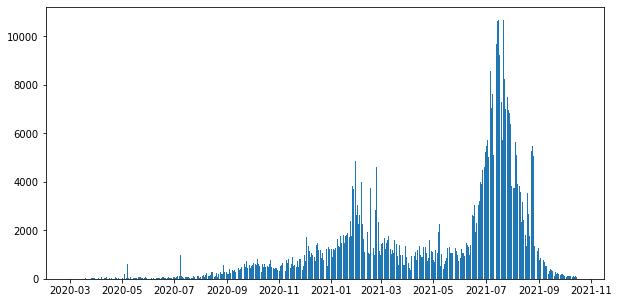

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

<Figure size 432x288 with 0 Axes>

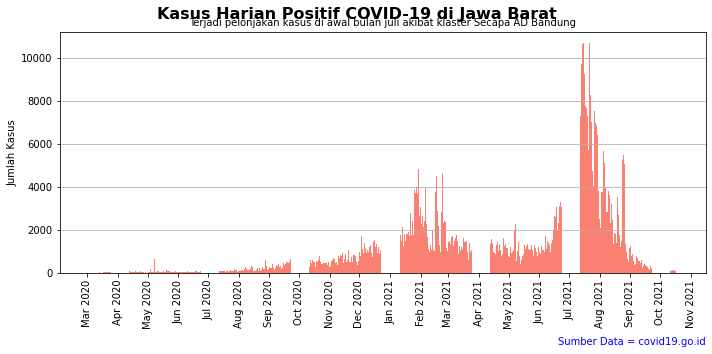

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat',
              y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juni akibat Peningkatan Aktivitas sejak Ramadan dan Idulfitri', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3,'Sumber Data = covid19.go.id', color='blue', ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

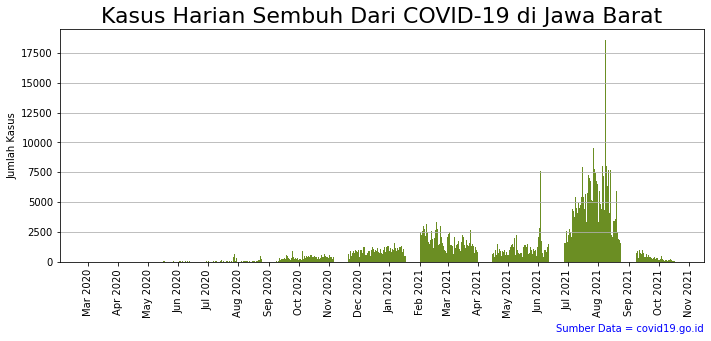

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3,'Sumber Data = covid19.go.id', color='blue', ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

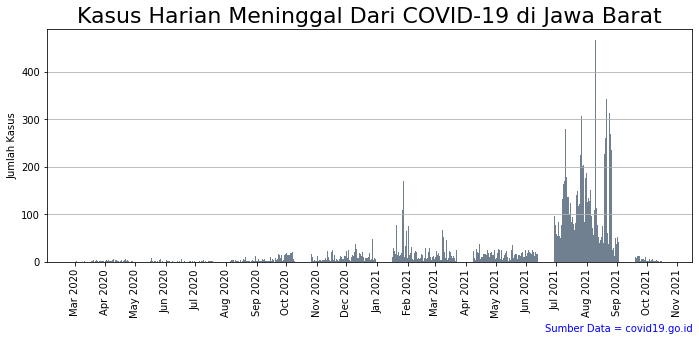

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3,'Sumber Data = covid19.go.id', color='blue', ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Setelah mengamati grafik perkembangan kasus COVID-19 Di Jawa Barat kita dapat melihat bahwa terjadi fluktuasi pertambahan kasus harian, Dan kita akan coba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan

In [ ]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                     .resample('W')
                     .sum()
                     .reset_index()
                     .rename(columns={'kasus_baru':'jumlah'})
)
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x:x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x:x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima Data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     85 non-null     int64
 1   pekan_ke  85 non-null     int64
 2   jumlah    85 non-null     int64
dtypes: int64(3)
memory usage: 2.1 KB
None

Lima Data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


Melihat apakah pekan ini lebih baik dari pekan kemarin

In [ ]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah']< cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False
